<a href="https://colab.research.google.com/github/sourojita08/CODSOFT/blob/main/Titanic_Survival_Prediction_(Task_1_CODSOFT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITANIC SURVIVAL PREDICTION**
*TASK 1 (CODSOFT)*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Importing dataset**

In [2]:
df = pd.read_csv('/content/Titanic-Dataset (1).csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#checking null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
#drop column
df= df.drop(columns='Cabin',axis=1)

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-7-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

<ipython-input-8-4a47dd7a9b9a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [9]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

<ipython-input-9-b38f1dd90478>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)


In [10]:
#rechecking null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Data Visualizations**

In [11]:
#Survival count
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-12-eb3b5da3477f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df, palette=['skyblue', 'salmon'])


<Axes: xlabel='Survived', ylabel='count'>

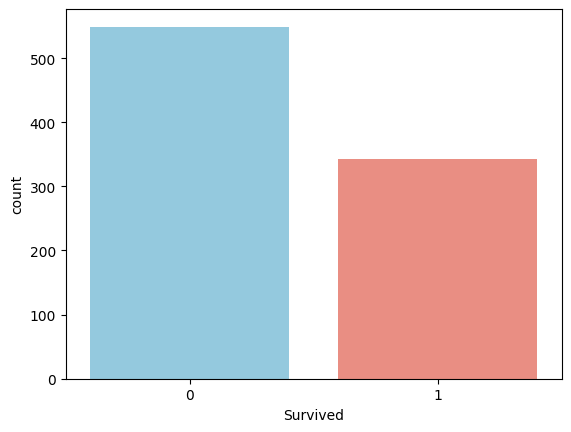

In [12]:
#survival plot
sns.countplot(x='Survived',data=df, palette=['skyblue', 'salmon'])

In [13]:
#gender count
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


<ipython-input-14-7a6530eaf936>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette=['green', 'yellow'])


<Axes: xlabel='Sex', ylabel='count'>

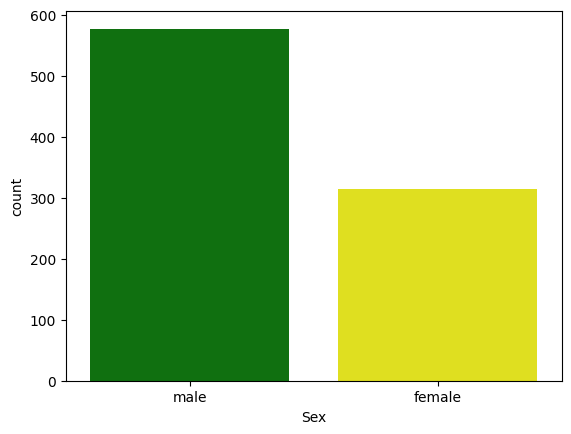

In [14]:
#gender plot
sns.countplot(x='Sex', data=df, palette=['green', 'yellow'])

In [15]:
#Pclass count
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<ipython-input-16-a824cc33a8c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='Set1')


Text(0, 0.5, 'Count')

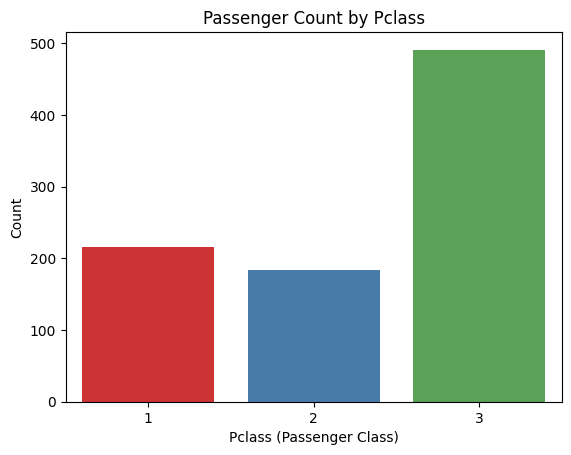

In [16]:
#plot for Pclass
sns.countplot(x='Pclass', data=df, palette='Set1')

plt.title('Passenger Count by Pclass')
plt.xlabel('Pclass (Passenger Class)')
plt.ylabel('Count')

<ipython-input-17-34d050429301>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'])


[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

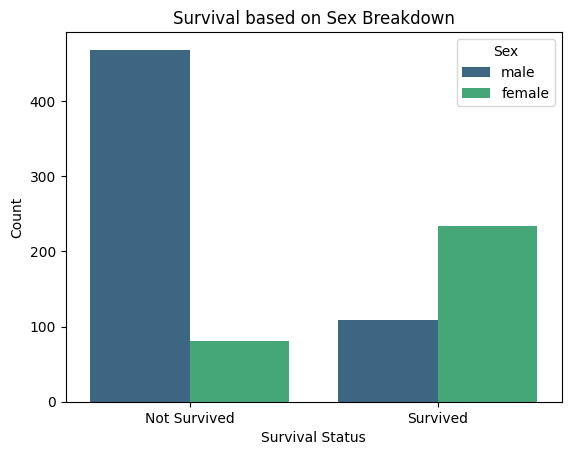

In [17]:
#survived based on sex
sns.countplot(x='Survived', hue= 'Sex', data=df, palette= 'viridis')
plt.title('Survival based on Sex Breakdown')
plt.xlabel('Survival Status')
plt.ylabel('Count')

# Get the current Axes object using gca()
ax = plt.gca()

# Modify x-axis tick labels
ax.set_xticklabels(['Not Survived', 'Survived'])

<ipython-input-18-6b5089226a85>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Survived', 'Survived'])


[Text(0, 0, 'Not Survived'), Text(1, 0, 'Survived')]

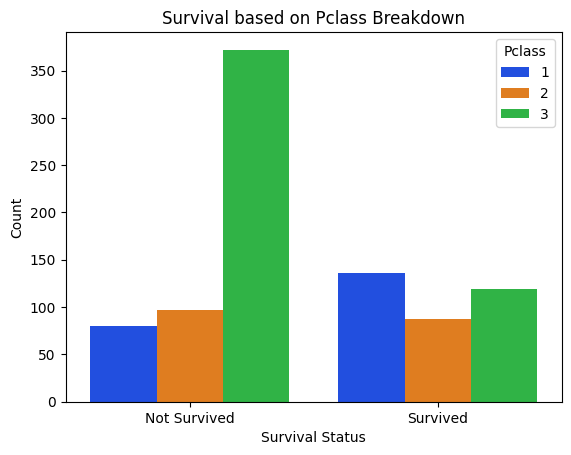

In [18]:
#survived based on Pclass
sns.countplot(x='Survived', hue='Pclass', data=df, palette='bright')
plt.title('Survival based on Pclass Breakdown')
plt.xlabel('Survival Status')
plt.ylabel('Count')

ax = plt.gca()
ax.set_xticklabels(['Not Survived', 'Survived'])

Doing necessary settings

In [19]:
#drop column
df=df.drop(columns='Age',axis=1)

In [20]:
#drop column
df=df.drop(columns='Sex',axis=1)

In [21]:
data = df
data.head(15)

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,237736,30.0708,C


In [22]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


**Training the model**

In [23]:
X= df[['Pclass', 'Parch']]
Y= df['Survived']

In [24]:
print(X)

     Pclass  Parch
0         3      0
1         1      0
2         3      0
3         1      0
4         3      0
..      ...    ...
886       2      0
887       1      0
888       3      2
889       1      0
890       3      0

[891 rows x 2 columns]


In [25]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X.shape, X_train.shape, X_test.shape)

(891, 2) (712, 2) (179, 2)


In [27]:
log = LogisticRegression(random_state=0)

In [28]:
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

**Prediction**

In [29]:
Prediction = log.predict(X_train)

In [30]:
print(Prediction)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0
 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 

In [31]:
Pred = log.predict(X_test)
print(Pred)

[0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0]


**Accuracy**

In [32]:
print(Y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


In [33]:
train_data_accuracy = accuracy_score(Y_train, Prediction)
print(f"Training Data Accuracy: {train_data_accuracy}")

Training Data Accuracy: 0.6797752808988764


In [34]:
import warnings
warnings.filterwarnings('ignore')

res = log.predict([[0, 1]])

if res == 0:
    print("Not survived")
else:
    print("Survived")

Survived
